In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_file = open("LAD4.txt", "r")

In [3]:
data = pd.read_csv("LAD4.txt")

In [4]:
data.columns

Index(['time', ' altitude', ' acceleration_x', ' acceleration_y',
       ' acceleration_z'],
      dtype='object')

Text(0, 0.5, 'altitude')

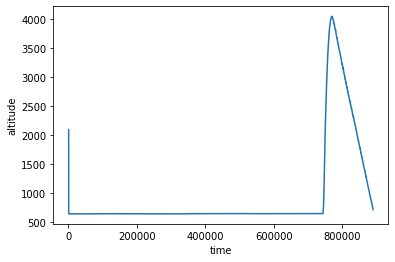

In [5]:
plt.plot(data['time'], data[' altitude'])
plt.xlabel('time')

plt.ylabel('altitude')

Text(0.5, 0, 'time (s)')

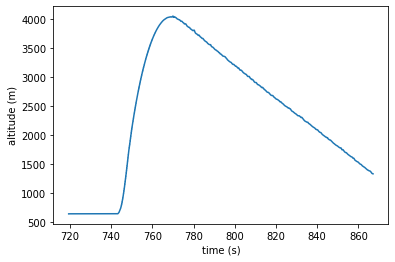

In [48]:
startIndex = 36000
endIndex = 43000

initialAltitude = np.mean(data[' altitude'][:startIndex])

altitude = data[' altitude'][startIndex:endIndex]
time = data['time'][startIndex:endIndex]

time /= 1000

plt.plot(time, altitude)
plt.ylabel('altitude (m)')
plt.xlabel('time (s)')


Text(0.5, 0, 'time (s)')

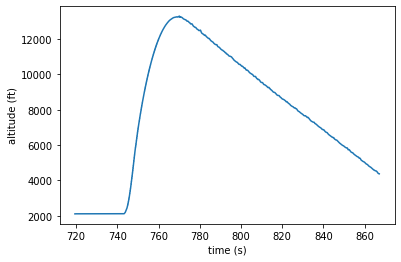

In [49]:
altitude_ft = altitude * 3.28084
initialAltitude_ft = initialAltitude * 3.28084
plt.plot(time, altitude_ft)
plt.ylabel('altitude (ft)')
plt.xlabel('time (s)')

In [50]:
print("apogee = {} m".format(np.max(altitude) - initialAltitude))
print("apogee = {} ft".format(np.max(altitude_ft) - initialAltitude_ft))

apogee = 3411.6720120448335 m
apogee = 11193.15000399717 ft


Text(0.5, 0, 'smoothed time (s)')

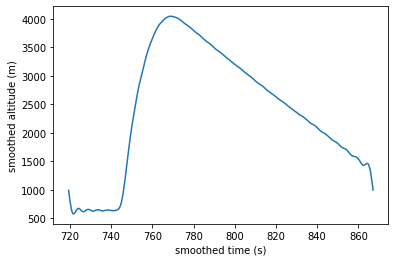

In [69]:
rft = np.fft.rfft(altitude)
rft[30:] = 0
smoothed_altitude = np.fft.irfft(rft)


rft_t = np.fft.rfft(time)
smoothed_time = np.fft.irfft(rft_t)

plt.plot(smoothed_time, smoothed_altitude)
plt.ylabel('smoothed altitude (m)')
plt.xlabel('smoothed time (s)')

In [70]:
# delta_t
delta_t = np.asarray([smoothed_time[i+1] - smoothed_time[i] for i in range(len(smoothed_time)-1)])

print(np.mean(delta_t))
print(np.std(delta_t))


0.02110330047149591
0.0035042951980254525


Text(0, 0.5, 'velocity (m/s)')

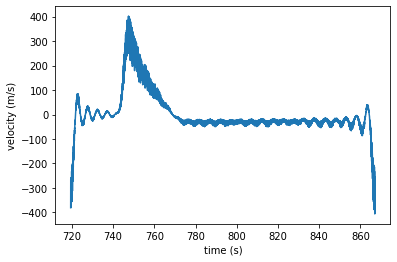

In [71]:
#delta_alt
delta_alt = np.asarray([smoothed_altitude[i+1] - smoothed_altitude[i] for i in range(len(smoothed_altitude) - 1)])

#vel 
vel = delta_alt / delta_t

plt.plot(time[:-1], vel)
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s)")

In [72]:
print("max velocity: {} m/s".format(np.max(vel)))
print("max velocity (mach): {}".format (np.max(vel) / 343))

max velocity: 401.5315813178837 m/s
max velocity (mach): 1.1706460096731304
